# 엑스포 

In [1]:
import pandas as pd

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import json


import numpy as np 
import pandas as pd 
from time import time
import re
import string
import os
import collections


from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [2]:
wordcloud = WordCloud 

In [85]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/yuseong_hotspring.csv")
df = df[['comment']]
df

,comment
0,코로나로 한산한 유성의 이팝의 거리가 한산함에서 운함
1,꽃이 약간 시든 게 아쉬워서요
2,야경이 좋아요
3,소 연장 족욕 체험장도 있고 데이트 장소로 너무 좋아요
4,유성구에서 수시로 관리하셔서 깨끗한 환경의 꽃길 힐링할 수 있는 곳 추천합니다
...,...
427,우선 짜다 지하철에서 가까워 접근이 쉽다 웅덩이처럼 고인 곳과 개울처럼 긴 곳이 있...
428,언니 누구나 와서 쉴 수 있는 간이죠
429,온 천축 재밌어요
430,족욕 넘세하고 좋은 연도 몇 프로 보고 아주 좋았습니다


In [4]:
from konlpy.tag import Okt

okt = Okt()

def tw_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [ ]:
# df['comment']를 통으로 넣지말고 문장 구성을 명사끼리만 추출해서 넣어본다. 

In [5]:
#Generate document term matrix to find most occuring terms in the reviews
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])
#text_dtm.index=textdata.index
tfidf

/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<432x482 sparse matrix of type '<class 'numpy.float64'>'
	with 4015 stored elements in Compressed Sparse Row format>

In [68]:
vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,3), min_df=3)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df

,가,가 싹,가는,가면,가서,가장,가족,간,간이,갈,...,합니다,해,해 요,해보세요,호텔,화,후,휴식,흐르는,힐링
0,0.219532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.270311,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.250788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.077677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.10491,0.0,0.0,0.000000
428,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.340438,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000
430,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000


In [54]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(sd['comment']) # 벡터라이저가 단어들을 학습합니다. 
tfidf_vectorizer.vocabulary_ # 벡터라이저가 학습한 단어사전을 출력합니다. 
sorted(tfidf_vectorizer.vocabulary_.items()) # 단어사전을 정렬합니다.

[('가격', 0),
 ('가고', 1),
 ('가기', 2),
 ('가까운', 3),
 ('가까워', 4),
 ('가까이', 5),
 ('가까이에', 6),
 ('가깝고', 7),
 ('가꾸어', 8),
 ('가는', 9),
 ('가는지', 10),
 ('가능합니다', 11),
 ('가능해서', 12),
 ('가도', 13),
 ('가득', 14),
 ('가면', 15),
 ('가벼운', 16),
 ('가벼워지는', 17),
 ('가벼워진', 18),
 ('가보려고', 19),
 ('가보세요', 20),
 ('가서', 21),
 ('가시면', 22),
 ('가십니다', 23),
 ('가십시오', 24),
 ('가야', 25),
 ('가야겠네요', 26),
 ('가장', 27),
 ('가져가면', 28),
 ('가져가세요', 29),
 ('가져가실', 30),
 ('가져갈', 31),
 ('가족', 32),
 ('가족과', 33),
 ('가족끼리', 34),
 ('가족이', 35),
 ('가지', 36),
 ('각지', 37),
 ('간다면', 38),
 ('간단하게', 39),
 ('간단한', 40),
 ('간단히', 41),
 ('간식과', 42),
 ('간에', 43),
 ('간으로', 44),
 ('간이', 45),
 ('간이니', 46),
 ('간이죠', 47),
 ('간입니다', 48),
 ('간지럽다', 49),
 ('간편히', 50),
 ('간혹', 51),
 ('갈아주는', 52),
 ('감동에', 53),
 ('감사드리니', 54),
 ('감사한', 55),
 ('감사해', 56),
 ('감사해요', 57),
 ('갑니다', 58),
 ('갑입니다', 59),
 ('갑중에', 60),
 ('갑천', 61),
 ('갔기', 62),
 ('갔네요', 63),
 ('갔는데', 64),
 ('갔다', 65),
 ('갔지만', 66),
 ('강추예요', 67),
 ('강추합니다', 68),
 ('갖추어', 69),
 ('같군요', 70),
 ('같네요

In [69]:
df.T.sum(axis=1).head  #

<bound method NDFrame.head of 가      9.066673
가 싹    1.011956
가는     0.982464
가면     1.095567
가서     1.159596
         ...   
화      0.802319
후      2.766195
휴식     3.653705
흐르는    0.846309
힐링     7.360981
Length: 527, dtype: float64>

# 다른 시도

In [74]:
from konlpy.tag import Twitter
import pandas as pd

kor_corpus = pd.read_csv(r'/home/aiffel-dj57/wordcloud/yuseong_hotspring.csv')

pos_tagger = Twitter()

# 한글 문서 명사만 뽑아서 tf-idf
total_news = []
stopword = ['것','수','저','이', '가']

for news in kor_corpus['comment'].head():
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [76]:
kor_corpus['comment'][1]

'꽃이 약간 시든 게 아쉬워서요'

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


kor_vectorizer = CountVectorizer(min_df=1) # 등장하는 단어들에 대한 오브젝트
kor_bow = kor_vectorizer.fit_transform(total_news) # 딕셔너리에 실제 단어들을 입력
transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(kor_bow.toarray())
tfidf.toarray()

array([[0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.40824829, 0.        ,
        0.        , 0.40824829, 0.        , 0.        , 0.        ,
        0.40824829, 0.40824829, 0.40824829, 0.40824829, 0.        ,
        0.        , 0.        , 0.        ],
    

In [86]:
# TF bow 생성
kor_vectorizer = CountVectorizer(min_df=1)
kor_bow = kor_vectorizer.fit_transform(df)

# TF-IDF bow 생성
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

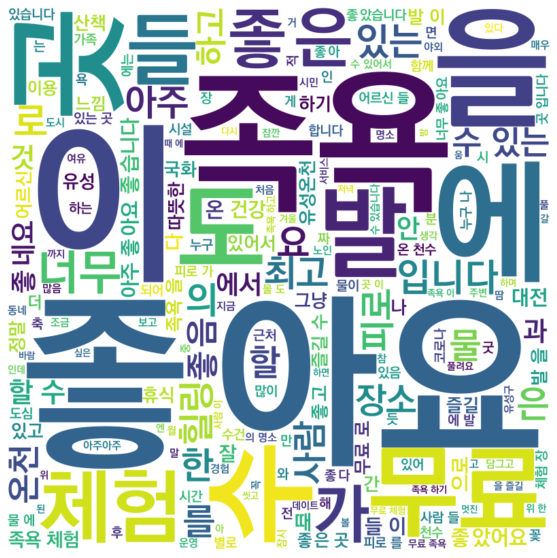

In [96]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/yuseong_hotspring.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
#    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('yuseong_hotspring2.png')


# water_barrel.csv

In [16]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/water_barrel.csv")
df = df[['comment']]

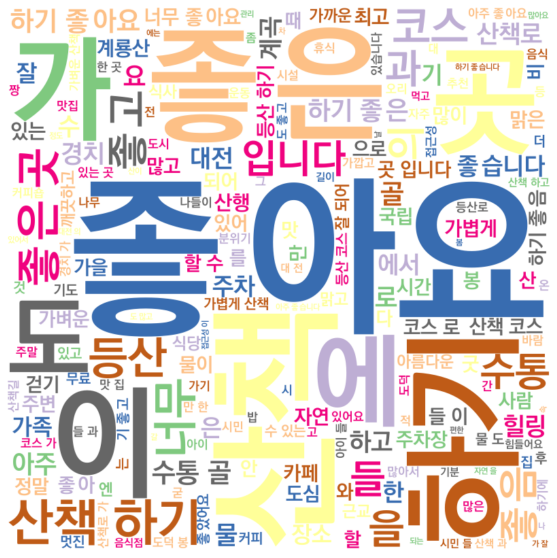

In [92]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/water_barrel.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=, max_df=0.9)
data=cv.fit(df['comment'])3
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('water_barrel.png')



# uineungjeongi_street

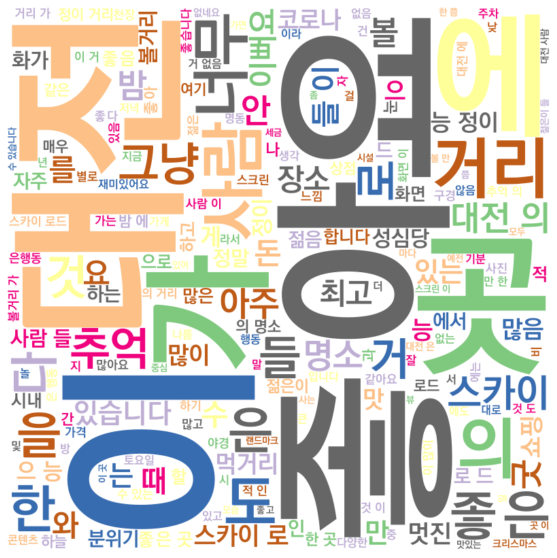

In [20]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/uineungjeongi_street.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('uineungjeongi_street.png')


# sungsimdang_bakery

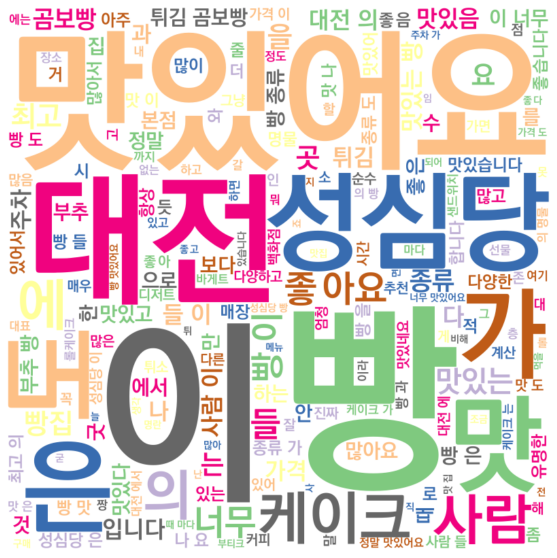

In [21]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/sungsimdang_bakery.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('sungsimdang_bakery.png')


In [ ]:
# science_museum

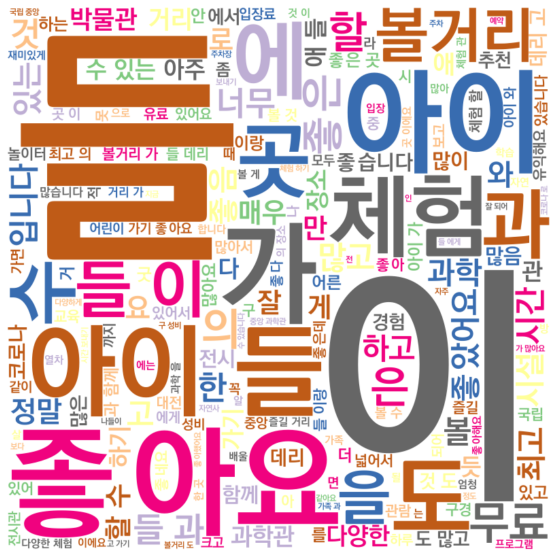

In [22]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/science_museum.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('science_museum.png')


In [ ]:
# ppuri_park

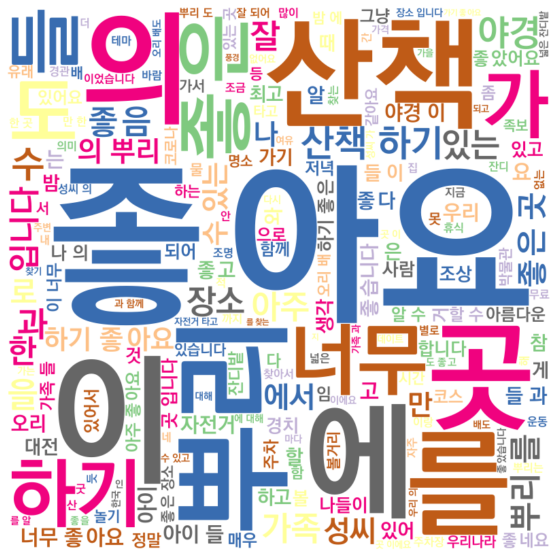

In [24]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/ppuri_park.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('ppuri_park.png')


In [ ]:
# oworld_zoo.csv

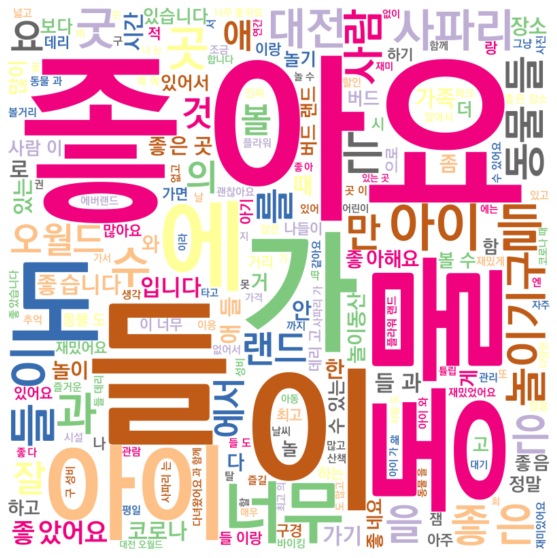

In [25]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/oworld_zoo.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('oworld_zoo.png')


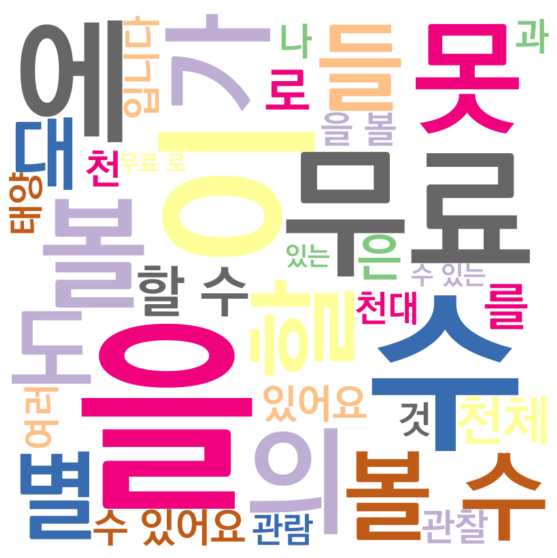

In [27]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/observatory.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('observatory.png')

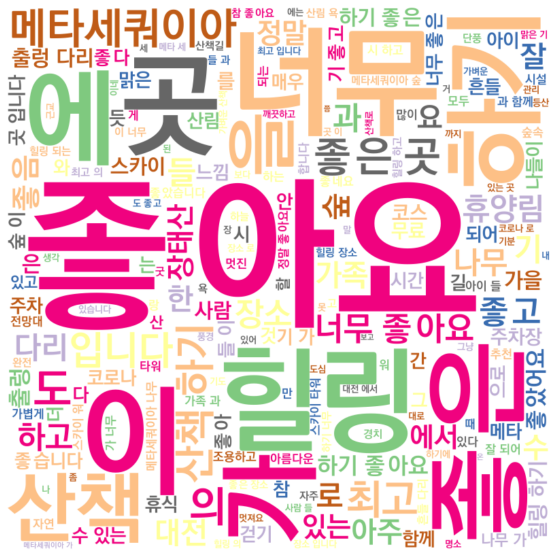

In [29]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/jangtae_mountain.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('jangtae_mountain.png')

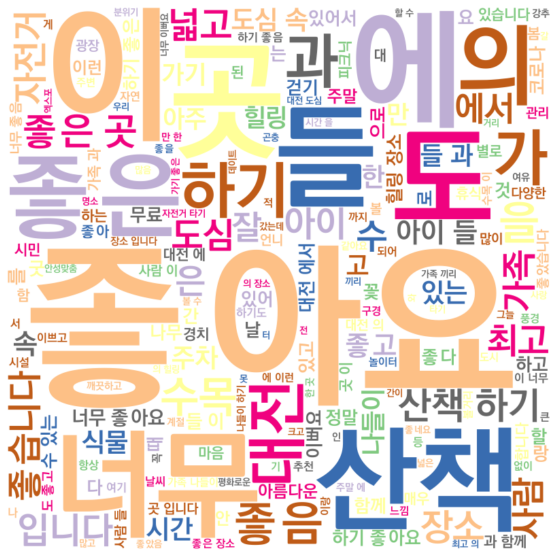

In [30]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/hanbat_arboretum.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('hanbat_arboretum.png')

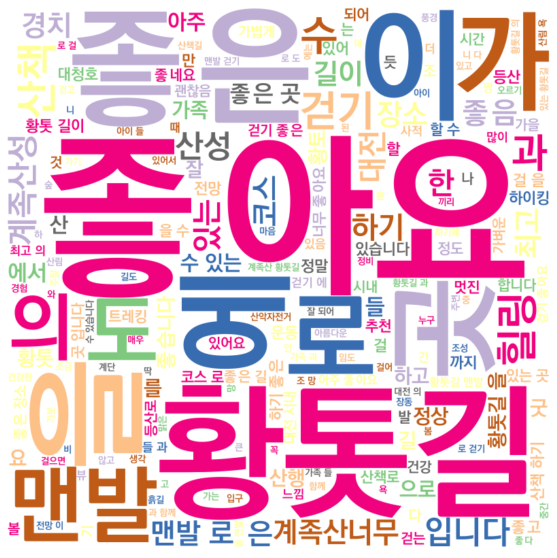

In [31]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/gyejok_mountain.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('gyejok_mountain.png')

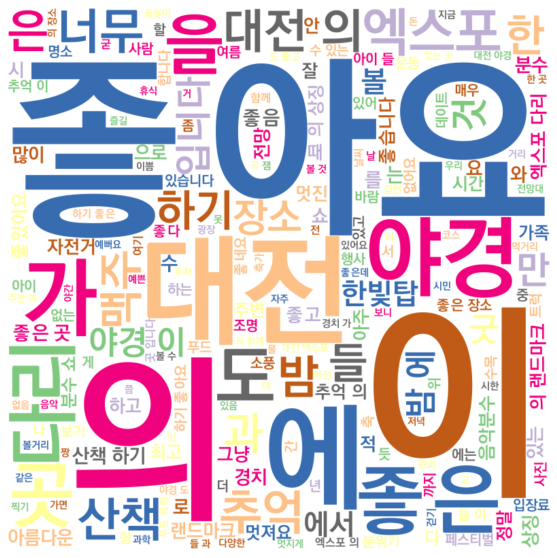

In [34]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/expo_science_park.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('expo_science_park.png')

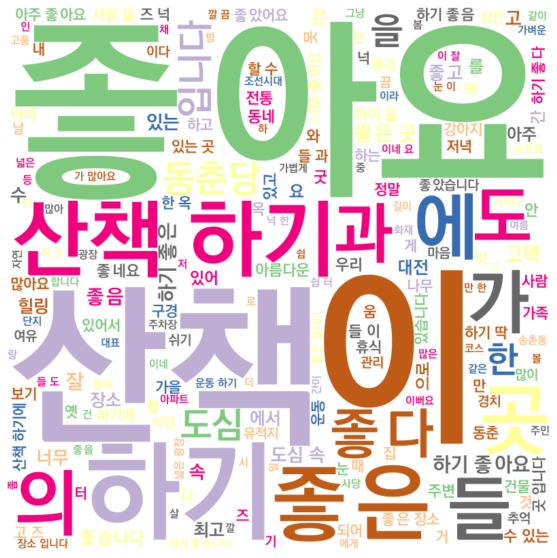

In [35]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/dongchundang.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('dongchundang.png')

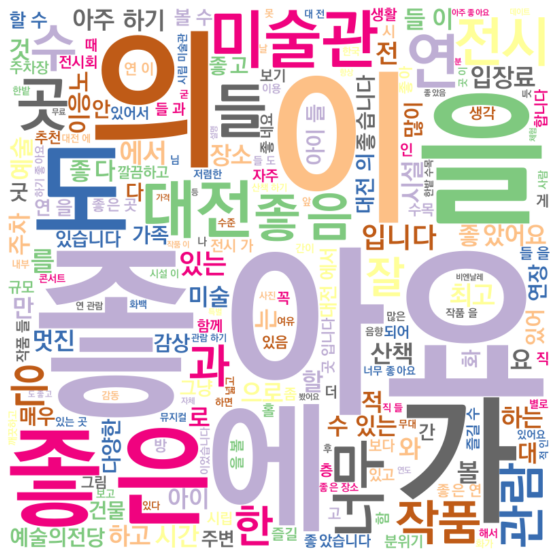

In [38]:
df = pd.read_csv("/home/aiffel-dj57/wordcloud/art_culture_complex.csv")
df = df[['comment']]

cv=TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
data=cv.fit(df['comment'])
tfidf = cv.transform(df['comment'])

vectorizer = TfidfVectorizer(tokenizer= tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
vecs = vectorizer.fit_transform(df['comment'])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

df.T.sum(axis=1)

wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(df.T.sum(axis=1))


array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('art_culture_complex.png')